In [31]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
# read file
out_dir = "output"
input_file_path = os.path.join(out_dir, "parsed-grit-table-2024.07.16-full.csv")
df_orig = pd.read_csv(input_file_path)

In [33]:
display(df_orig.describe())
display(df_orig.info())

,place,bib,chip_time,distance_miles,elevation_gain_ft,age,age_percentage,run_crew_name
count,1912.000000,1912.000000,0.0,1909.000000,1912.000000,1912.000000,1847.000000,0.0
mean,956.500000,1342.523536,NaN,58.660351,2150.449791,39.707113,58.805306,NaN
std,552.091176,741.944693,NaN,40.125996,3838.013064,9.192003,17.818410,NaN
min,1.000000,100.000000,NaN,0.100000,0.000000,6.000000,0.800000,NaN
25%,478.750000,698.750000,NaN,30.100000,210.750000,34.000000,46.900000,NaN
50%,956.500000,1324.500000,NaN,51.430000,1190.000000,39.000000,57.900000,NaN
75%,1434.250000,1976.250000,NaN,78.310000,2695.500000,45.000000,70.500000,NaN
max,1912.000000,2675.000000,NaN,303.980000,80230.000000,77.000000,119.400000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place              1912 non-null   int64  
 1   bib                1912 non-null   int64  
 2   name               1912 non-null   object 
 3   gender             1911 non-null   object 
 4   city               1899 non-null   object 
 5   state              1883 non-null   object 
 6   country            1912 non-null   object 
 7   clock_time         1912 non-null   object 
 8   chip_time          0 non-null      float64
 9   distance_miles     1909 non-null   float64
 10  progress           1912 non-null   object 
 11  elevation_gain_ft  1912 non-null   float64
 12  pace               1850 non-null   object 
 13  age                1912 non-null   int64  
 14  age_percentage     1847 non-null   float64
 15  run_crew_name      0 non-null      float64
dtypes: float64(5), int64(3),

None

In [34]:
# Make changes to dataframe for viewing elevation data

# sort by elevation and add "elevation_place"
df = df_orig.copy()
df.sort_values("elevation_gain_ft", ascending=False, inplace=True)
df["elevation_place"] = [i for i in range(1, len(df) + 1)]

# select columns I care most about and reorder them
columns = ["place", "elevation_place", "elevation_gain_ft", "distance_miles", "name", "gender", "city", "state", "country", "pace", "age"]
df = df[columns]

In [35]:
# Display the top 15 runners by elevation
display(df.iloc[:15])

,place,elevation_place,elevation_gain_ft,distance_miles,name,gender,city,state,country,pace,age
12,13,1,80230.0,205.663,Andrea Rosa,M,Baltimore,MD,US,18:45,29
3,4,2,59072.0,251.730,Jana Fridrichova,F,Hagerstown,MD,US,14:20,45
6,7,3,41988.0,236.878,Mac McComas,M,Baltimore,MD,US,13:11,36
131,132,4,33738.0,122.170,Annie Tomlinson,F,Denver,CO,US,19:34,37
1583,1584,5,30000.0,21.500,Claire Howard-coster,F,Cortlandt Manor,NY,US,18:36,56
183,184,6,25813.0,112.200,Curtis Musser,M,Denver,PA,US,13:27,49
226,227,7,24831.0,105.180,Shannon Cebron,F,Baltimore,MD,US,11:52,33
201,202,8,24303.0,109.200,Matthew Perkett,M,Golden,CO,US,10:40,38
22,23,9,24276.0,180.810,Eric Perramond,M,Colorado Springs,CO,US,10:36,53
284,285,10,21311.0,99.590,Mischa Gasch,M,Santa Cruz,CA,US,13:58,47


## Elevation gain histograms

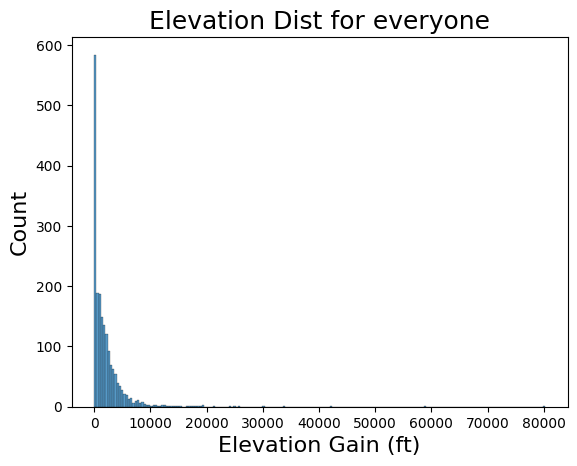

In [36]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="elevation_gain_ft", ax=ax)
ax.set_title("Elevation Dist for everyone", fontsize=18)
ax.set_xlabel("Elevation Gain (ft)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-elevation-distribution-all.png")
fig.savefig(out_file_path, dpi=300)

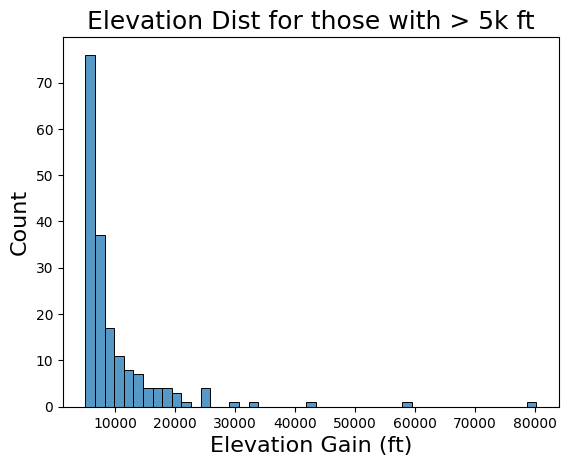

In [37]:
fig, ax = plt.subplots()
ax = sns.histplot(df[df["elevation_gain_ft"] > 5000], x="elevation_gain_ft", ax=ax)
ax.set_title("Elevation Dist for those with > 5k ft", fontsize=18)
ax.set_xlabel("Elevation Gain (ft)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-elevation-distribution-gt-5k-ft.png")
fig.savefig(out_file_path, dpi=300)

## Distance

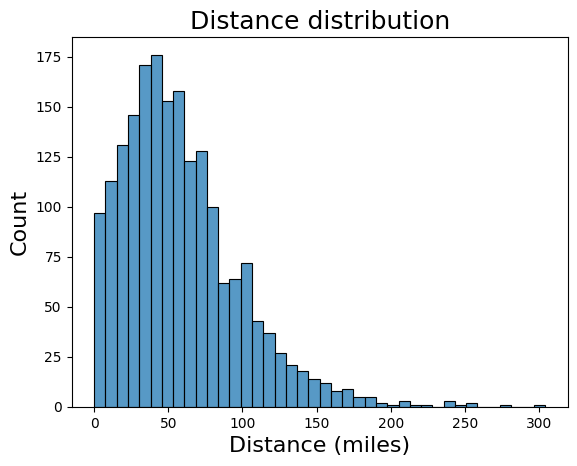

In [38]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="distance_miles", ax=ax)
ax.set_title("Distance distribution", fontsize=18)
ax.set_xlabel("Distance (miles)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-distance-distribution.png")
fig.savefig(out_file_path, dpi=300)

## Age

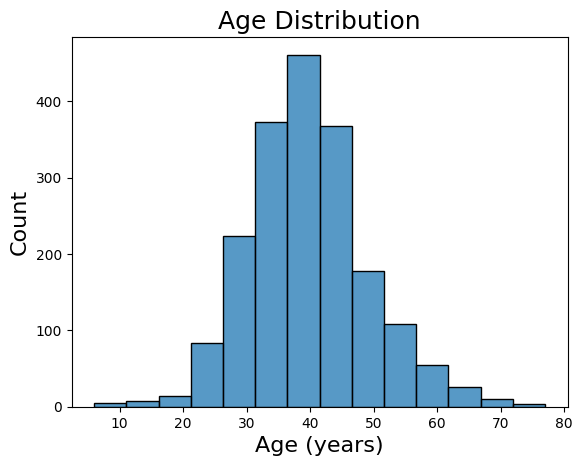

In [39]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="age", binwidth=5)
ax.set_title("Age Distribution", fontsize=18)
ax.set_xlabel("Age (years)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-age-distribution.png")
fig.savefig(out_file_path, dpi=300)

## Location

In [40]:
# https://countrycode.org/
mapping = {
    "US" : "United States",
    "GB" : "Great Britain",
    "CA" : "Canada",
    "AU" : "Australia",
    "DE" : "Germany",
    "AL" : "Albania",
    "CO" : "Colombia",
    "FR" : "France",
    "IE" : "Ireland",
    "IL" : "Israel",
    "CN" : "China",
    "JP" : "Japan",
    "KE" : "Kenya",
    "PR" : "Puerto Rico",
    "KR" : "South Korea",
    "PT" : "Portugal",
    "SE" : "Sweden",
    "SG" : "Singapore",
    "VE" : "Venezuala"
}

df_country = pd.DataFrame(df[["country"]].value_counts(dropna=False))

#df_country["country_full_name"] = df_country["country"].map(mapping)
display(df_country)
df_country.columns

,count
country,
US,1876
GB,11
CA,6
AU,3
DE,2
AL,1
CO,1
FR,1
IE,1


Index(['count'], dtype='object')

In [41]:
pd.DataFrame(df["country"].value_counts(dropna=False))

,count
country,
US,1876
GB,11
CA,6
AU,3
DE,2
IE,1
CN,1
PR,1
JP,1


In [42]:
df_us = df[df["country"] == "US"]
df_state = pd.DataFrame(df_us[["state"]].value_counts(dropna=False))
total = len(df)
df_state["fraction"] = df_state["count"] / total
display(df_state)

,count,fraction
state,,
MD,258,0.134937
NY,191,0.099895
TX,148,0.077406
PA,120,0.062762
CA,114,0.059623
VA,114,0.059623
NJ,85,0.044456
FL,80,0.041841
MA,77,0.040272


# Gender

In [43]:
df_gender = pd.DataFrame(df[["gender"]].value_counts(dropna=False))
total = len(df)
df_gender["fraction"] = df_gender["count"] / total
display(df_gender)

,count,fraction
gender,,
F,969,0.506799
M,940,0.491632
X,2,0.001046
NaN,1,0.000523
